In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mglearn
import sklearn
from sklearn.decomposition import PCA
import os.path as path
import wget

In [2]:
X = np.random.gamma( 2,3, 10000 )
Y = np.random.normal( 5, 2, 10000 )
Z = np.random.uniform( 0, 10, 10000 )

In [3]:
U = np.array([1,2,-1])
W = U[0]*X + U[1]*Y + U[2]*Z

(array([  35.,  419., 1909., 3211., 2794., 1182.,  348.,   76.,   21.,
           5.]),
 array([-10.08301164,  -4.63371838,   0.81557489,   6.26486815,
         11.71416141,  17.16345468,  22.61274794,  28.06204121,
         33.51133447,  38.96062774,  44.409921  ]),
 <a list of 10 Patch objects>)

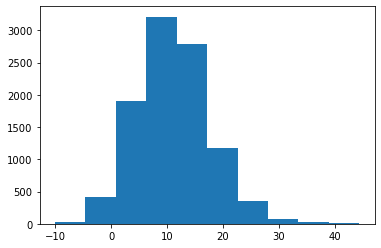

In [4]:
plt.hist(W)

In [5]:
meanw = np.mean(W)
varw = np.std(W)**2

print(meanw, varw)

11.079916761810551 41.88381508346986


In [6]:
data = np.zeros( (10000,3) )

data[:,0] = X
data[:,1] = Y 
data[:,2] = Z

In [7]:
print(data)

[[12.48038471  8.62163175  9.62277002]
 [ 1.24538863 -0.92229446  2.22717064]
 [14.99480711  2.87478855  7.72948131]
 ...
 [ 8.55424229  6.73306233  5.13357517]
 [ 3.29001474  7.70870555  6.43525532]
 [ 5.32992849  5.07382927  9.76136318]]


In [8]:
Ew = np.dot( U, np.mean(data,axis=0) )
print(Ew)

11.079916761810605


In [9]:
def Cov(data):
    
    Nvars = len(data[0])
    
    CovM = np.zeros( (Nvars,Nvars) )
    
    for i in range(Nvars):
        for j in range(Nvars):
            
            # Tomar columna i y columna j
            X = data[:,i]
            Y = data[:,j]
            
            meanX = np.mean(X)
            meanY = np.mean(Y)
            
            CovM[i,j] = np.mean( (X-meanX)*(Y-meanY)  )
            
    return CovM

In [10]:
Cov_ = Cov(data)
print(np.round(Cov_,1))

[[17.7 -0.1 -0.1]
 [-0.1  4.   0. ]
 [-0.1  0.   8.3]]


In [11]:
temp = np.dot(U.T,Cov_)
VarW_ = np.dot(temp,U)
print(VarW_)

41.88381508346985


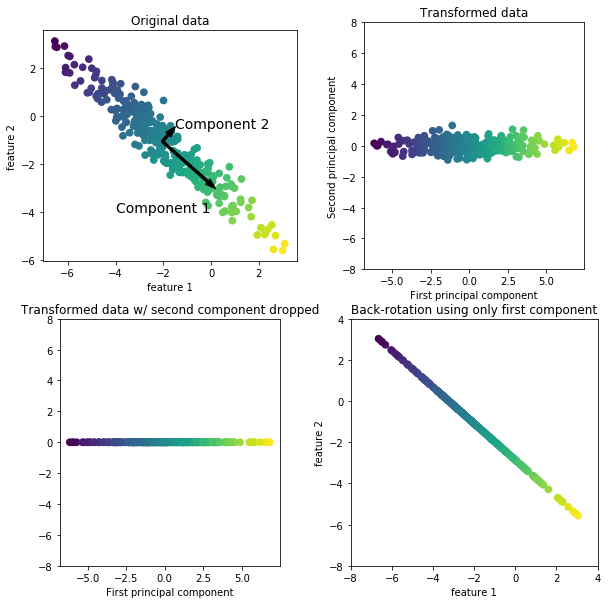

In [12]:
mglearn.plots.plot_pca_illustration()

In [13]:
!rm Data/*
file = 'data.dat'
url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionales/PCA.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

rm: no se puede borrar 'Data/*': No existe el archivo o el directorio


In [14]:
data = np.loadtxt(Path_)

In [15]:
data[:,0] = (data[:,0] - np.mean(data[:,0]))
data[:,1] = (data[:,1] - np.mean(data[:,1]))

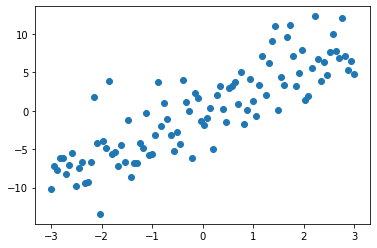

In [16]:
plt.scatter( data[:,0], data[:,1]  )

In [17]:
CovMatrix = np.cov(data.T)
print(CovMatrix)

[[ 3.09152137  8.82101855]
 [ 8.82101855 34.56025706]]


In [18]:
values, vectores = np.linalg.eig(CovMatrix)

In [19]:
print(values)
print(vectores)

[ 0.78757722 36.86420121]
[[-0.96754198 -0.25271035]
 [ 0.25271035 -0.96754198]]


In [20]:
new_data = np.dot( vectores.T, data.T )
new_data = new_data.T

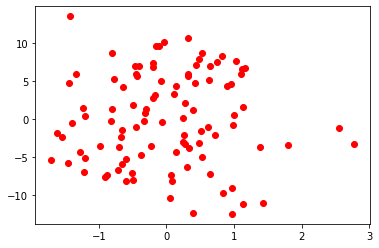

In [21]:
#plt.scatter( data[:,0], data[:,1], color='b'  )
plt.scatter( new_data[:,0], new_data[:,1], color='r'  )

In [22]:
np.cov(new_data.T)

array([[ 7.87577218e-01, -1.60156678e-15],
       [-1.60156678e-15,  3.68642012e+01]])

# Necesitamos proyectar a lo largo de la dirección de mayor varianza

In [23]:
T_Data = np.dot(data, vectores.T[1])
print(T_Data)

[ 10.63227464   7.67148148   8.2179293    6.70115674   6.61698391
   8.6812961    7.55531665   5.97026562  10.10162965   7.85515119
   7.01268573   9.64109424   9.59099341   7.06510359  -1.24810954
   4.6327968   13.49372662   4.35277842   5.14445362  -3.33494355
   5.87185544   5.62061134   7.38302237   4.73331524   6.89926675
   1.53107699   8.74009046   6.97739001   6.94191842   4.35576331
   4.97941034   0.58039505   5.89519257   5.64402684   3.30842157
  -3.40132004   2.15837106  -0.76798147   1.23070234   3.16205201
   5.22876081   2.81723542   4.24691432  -3.74609176  -1.06475677
   0.11537299   5.95068295  -2.16563346  -1.57601198   1.27420456
   1.77625672   0.83362356  -0.3473829    4.71066671  -2.06366703
  -3.18408989  -0.28452774   1.26939251  -2.99667695  -3.3212946
  -3.82435892  -1.0580747   -5.03628567   1.48181866  -0.30803682
  -4.28513995  -1.44067157   0.44255837  -3.54482392  -7.16937604
  -2.32177648  -6.30621648  -9.12421883 -11.10889179  -0.53794279
  -4.697876

In [24]:
M = np.zeros((len(T_Data),2))
M[:,1] = T_Data
#print(M)

In [25]:
# Hacemos la transformada inversa
new_data = np.dot(vectores, M.T)

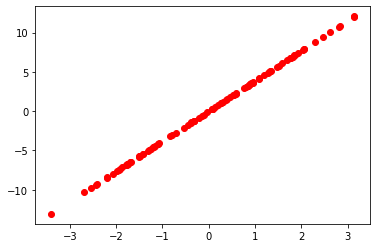

In [26]:
plt.scatter( new_data[0,:], new_data[1,:], color='r'  )

# Paquetes

In [31]:
pca = PCA(n_components = 1)
pca.fit(data)

PCA(n_components=1)

In [28]:
data1 = pca.transform(data)
#print(data1)
newdata1 = pca.inverse_transform(data1)

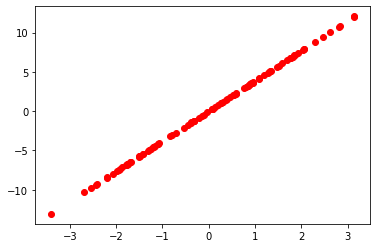

In [29]:
plt.scatter( newdata1[:,0], newdata1[:,1], color='r'  )

In [35]:
pca = PCA(n_components = 2)
pca.fit(data)
pca.explained_variance_

array([36.86420121,  0.78757722])

In [36]:
pca.components_

array([[-0.25271035, -0.96754198],
       [-0.96754198,  0.25271035]])